#### Breadth First Search or BFS for a Graph:

Breadth First Search (BFS) is a fundamental graph traversal algorithm . It involves visiting all the connected nodes of a graph in a level-by-level manner. In this article, we will look into the concept of BFS and how it can be applied to graphs effectively

Breadth First Search (BFS) is a graph traversal algorithm that explores all the vertices in a graph at the current depth before moving on to the vertices at the next depth level. It starts at a specified vertex and visits all its neighbors before moving on to the next level of neighbors. BFS is commonly used in algorithms for pathfinding, connected components, and shortest path problems in graphs.

Relation between BFS for Graph and BFS for Tree:

Breadth-First Traversal (BFS) for a graph is similar to the Breadth-First Traversal of a tree .

The only catch here is, that, unlike trees , graphs may contain cycles, so we may come to the same node again. To avoid processing a node more than once, we divide the vertices into two categories:

- Visited and
- Not visited.

A boolean visited array is used to mark the visited vertices. For simplicity, it is assumed that all vertices are reachable from the starting vertex. BFS uses a queue data structure for traversal.

Let’s discuss the algorithm for the BFS:

1. Initialization: Enqueue the starting node into a queue and mark it as visited.
2. Exploration: While the queue is not empty:
    - Dequeue a node from the queue and visit it (e.g., print its value).
    - For each unvisited neighbor of the dequeued node:
        - Enqueue the neighbor into the queue.
        - Mark the neighbor as visited.
3. Termination: Repeat step 2 until the queue is empty.

This algorithm ensures that all nodes in the graph are visited in a breadth-first manner, starting from the starting node.

##### How Does the BFS Algorithm Work?

Starting from the root, all the nodes at a particular level are visited first and then the nodes of the next level are traversed till all the nodes are visited.

To do this a queue is used. All the adjacent unvisited nodes of the current level are pushed into the queue and the nodes of the current level are marked visited and popped from the queue.

##### Illustration:

Step1: Initially queue and visited arrays are empty.



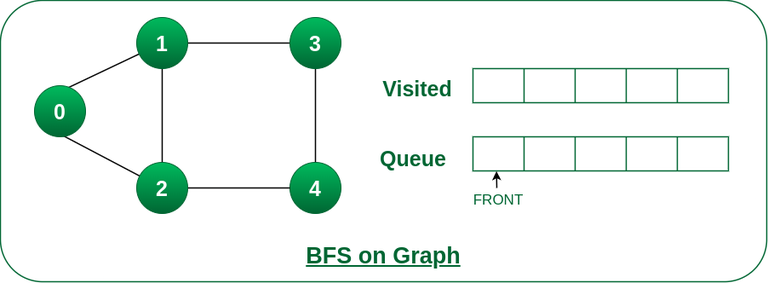

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs1.png")

Step2: Push node 0 into queue and mark it visited.

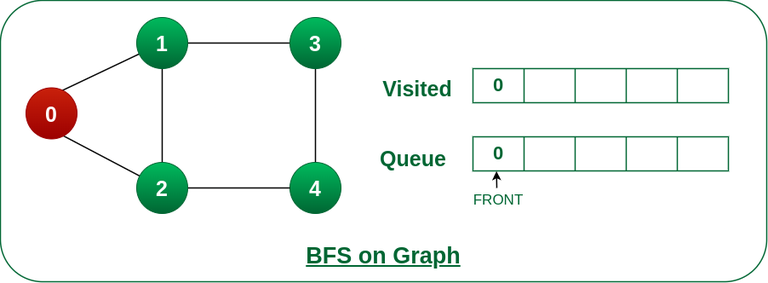

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs2.png")

Step 3: Remove node 0 from the front of queue and visit the unvisited neighbours and push them into queue.



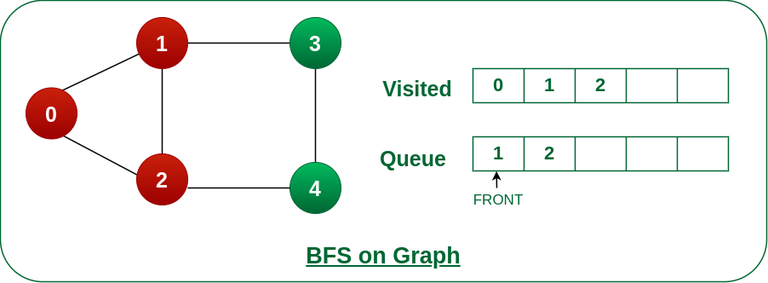

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs3.png")

Step 4: Remove node 1 from the front of queue and visit the unvisited neighbours and push them into queue.



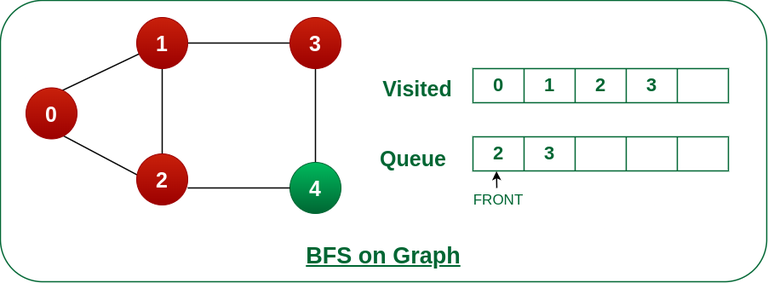

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs4.png")

Step 5: Remove node 2 from the front of queue and visit the unvisited neighbours and push them into queue.



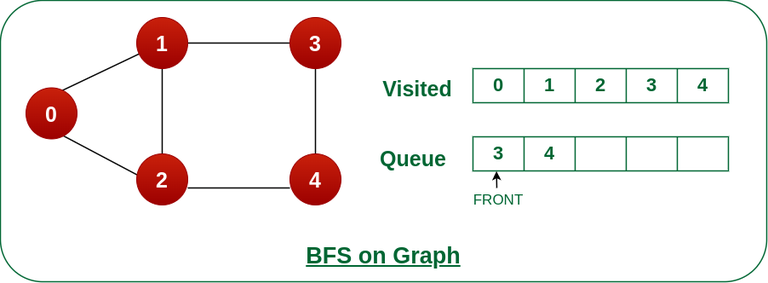

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs5.png")

Step 6: Remove node 3 from the front of queue and visit the unvisited neighbours and push them into queue.

As we can see that every neighbours of node 3 is visited, so move to the next node that are in the front of the queue.

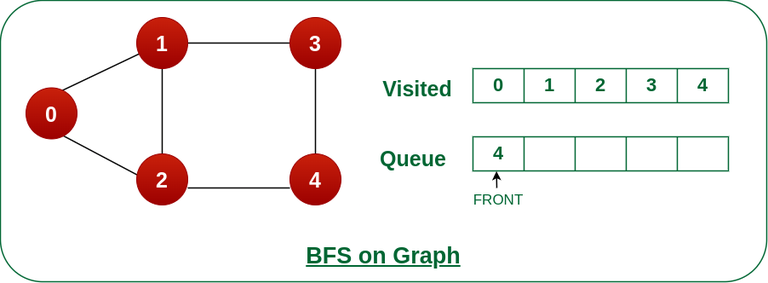

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs6.png")

Steps 7: Remove node 4 from the front of queue and visit the unvisited neighbours and push them into queue.

As we can see that every neighbours of node 4 are visited, so move to the next node that is in the front of the queue.


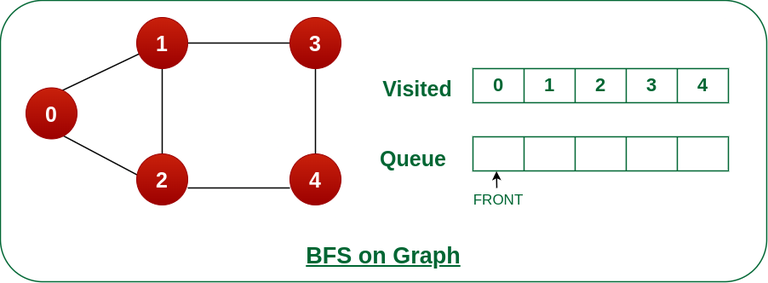

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/bfs7.png")

##### Implementation of BFS for Graph using Adjacency List:

In [1]:
def bfs(data, start, visited=set()):
    queue = [start]
    while queue:
        current_node = queue.pop(0)
        if current_node not in visited:
            print(current_node, end=" ")
        visited.add(current_node)

        for i in data[current_node] - visited:
            queue.append(i)
    return

if __name__ == '__main__':
    data = {
        'A': {'B'}, 
        'B': {'A', 'C', 'D'}, 
        'C': {'B', 'E'}, 
        'D': {'B', 'E'},
        'E': {'C', 'D', 'F'}, 
        'F': {'E'}
    }

    bfs(data, 'A')

A B C D E F 

In [13]:
from collections import deque

def bfs(adjList, startNode, visited):
    q = deque()
    visited[startNode] = True
    q.append(startNode)
    while q:
        currentNode = q.popleft()
        print(currentNode, end=" ")
        for neighbor in adjList[currentNode]:
            if not visited[neighbor]:
                visited[neighbor] = True
                q.append(neighbor)

def addEdge(adjList, u, v):
    adjList[u].append(v)

if __name__ == "__main__":
    vertices = 5
    adjList = [[] for _ in range(vertices)]
    addEdge(adjList, 0, 1)
    addEdge(adjList, 0, 2)
    addEdge(adjList, 1, 3)
    addEdge(adjList, 1, 4)
    addEdge(adjList, 2, 4)
    
    visited = [False] * vertices
    print(f"Breadth First Traversal starting from vertex {0}:", end=" ")
    bfs(adjList, 0, visited)


Breadth First Traversal starting from vertex 0: 0 1 2 3 4 

##### Time Complexity of BFS Algorithm: O(V + E)

BFS explores all the vertices and edges in the graph. In the worst case, it visits every vertex and edge once. Therefore, the time complexity of BFS is O(V + E), where V and E are the number of vertices and edges in the given graph.

##### Space Complexity of BFS Algorithm: O(V)

BFS uses a queue to keep track of the vertices that need to be visited. In the worst case, the queue can contain all the vertices in the graph. Therefore, the space complexity of BFS is O(V), where V and E are the number of vertices and edges in the given graph.

#### BFS for Disconnected Graph

In the previous post, BFS only with a particular vertex is performed i.e. it is assumed that all vertices are reachable from the starting vertex. But in the case of a disconnected graph or any vertex that is unreachable from all vertex, the previous implementation will not give the desired output, so in this post, a modification is done in BFS. 

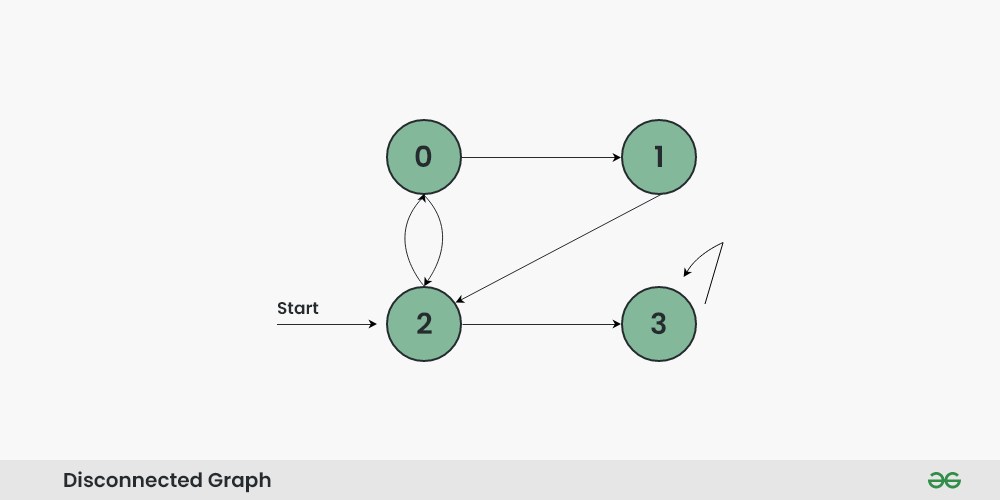

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/Dis1.png")

 All vertices are reachable. So, for the above graph, simple BFS will work. 

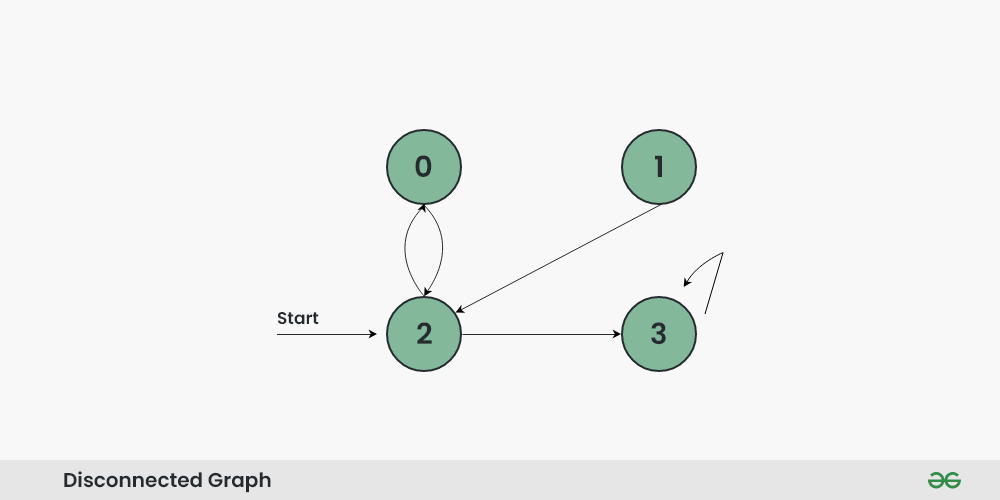

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Search/img/Di2.png")

As in the above graph vertex 1 is unreachable from all vertex, so simple BFS wouldn’t work for it.

Just to modify BFS, perform simple BFS from each unvisited vertex of given graph.

Following is the code when adjacency matrix representation is used for the graph.

In [3]:
import queue 

def add_edge(edges, f, s): 
	edges[f][s] = 1

def print_bfs(edges, V, start, visited): 
	if V == 0: 
		return
	bfs = queue.Queue() 
	bfs.put(start) 
	visited[start] = 1
	while not bfs.empty(): 
		data = bfs.get() 
		print(data, end=' ') 
		for i in range(V): 
			if edges[data][i] == 1: 
				if visited[i] == 0: 
					bfs.put(i) 
					visited[i] = 1

def bfs_helper(edges, V): 
	if V == 0: 
		return
	visited = [0] * V 
	for i in range(V): 
		if visited[i] == 0: 
			print_bfs(edges, V, i, visited) 

if __name__ == "__main__": 
	V = 5
	E = 6
	if E == 0: 
		for i in range(V): 
			print(i, end=' ') 
		exit() 

	edges = [[0 for _ in range(V)] for _ in range(V)] 

	add_edge(edges, 0, 4) 
	add_edge(edges, 1, 2) 
	add_edge(edges, 1, 3) 
	add_edge(edges, 1, 4) 
	add_edge(edges, 2, 3) 
	add_edge(edges, 3, 4) 

	bfs_helper(edges, V) 


0 4 1 2 3 

##### Time complexityof this algorithm is O(V + E)
 
 where V is the number of vertices and E is the number of edges. This is because we traverse each vertex and each edge once. 

##### Space complexity is O(V)
 
since we use an array to store the visited vertices

Following is the code when adjacency list representation is used for the graph.


In [5]:
import queue 

def addEdge(adj, u, v): 
	adj[u].append(v) 

def BFSUtil(u, adj, visited): 
	q = queue.Queue() 
	visited[u] = True
	q.put(u) 
	
	while(not q.empty()): 
		u = q.queue[0] 
		print(u, end = " ") 
		q.get() 
		i = 0
		while i != len(adj[u]): 
			if (not visited[adj[u][i]]): 
					visited[adj[u][i]] = True
					q.put(adj[u][i]) 
			i += 1

def BFS(adj, V): 
	visited = [False] * V 
	for u in range(V): 
		if (visited[u] == False): 
			BFSUtil(u, adj, visited) 

if __name__ == '__main__': 
	V = 5
	adj = [[] for i in range(V)] 
	addEdge(adj, 0, 4) 
	addEdge(adj, 1, 2) 
	addEdge(adj, 1, 3) 
	addEdge(adj, 1, 4) 
	addEdge(adj, 2, 3) 
	addEdge(adj, 3, 4) 
	BFS(adj, V) 

0 4 1 2 3 

##### Time complexity of the given BFS algorithm is O(V + E)

 where V is the number of vertices and E is the number of edges in the graph. 

##### Space complexity is also O(V + E) 

since we need to store the adjacency list and the visited array

#### Applications of BFS in Graphs:

BFS has various applications in graph theory and computer science, including:

- Shortest Path Finding: 

BFS can be used to find the shortest path between two nodes in an unweighted graph. By keeping track of the parent of each node during the traversal, the shortest path can be reconstructed.

- Cycle Detection: 

BFS can be used to detect cycles in a graph. If a node is visited twice during the traversal, it indicates the presence of a cycle.

- Connected Components: 

BFS can be used to identify connected components in a graph. Each connected component is a set of nodes that can be reached from each other.

- Topological Sorting: 

BFS can be used to perform topological sorting on a directed acyclic graph (DAG). Topological sorting arranges the nodes in a linear order such that for any edge (u, v), u appears before v in the order.

- Level Order Traversal of Binary Trees: 

BFS can be used to perform a level order traversal of a binary tree. This traversal visits all nodes at the same level before moving to the next level.

- Network Routing: 

BFS can be used to find the shortest path between two nodes in a network, making it useful for routing data packets in network protocols.

#### Applications of Breadth First Search:

1. Shortest Path and Minimum Spanning Tree for unweighted graph: 

In an unweighted graph, the shortest path is the path with the least number of edges. With Breadth First, we always reach a vertex from a given source using the minimum number of edges. Also, in the case of unweighted graphs, any spanning tree is Minimum Spanning Tree and we can use either Depth or Breadth first traversal for finding a spanning tree. 

2. Minimum Spanning Tree for weighted graphs: 

We can also find Minimum Spanning Tree for weighted graphs using BFT, but the condition is that the weight should be non-negative and the same for each pair of vertices.

3. Peer-to-Peer Networks: 

In Peer-to-Peer Networks like BitTorrent, Breadth First Search is used to find all neighbor nodes. 

4. Crawlers in Search Engines: 

Crawlers build an index using Breadth First. The idea is to start from the source page and follow all links from the source and keep doing the same. Depth First Traversal can also be used for crawlers, but the advantage of Breadth First Traversal is, the depth or levels of the built tree can be limited.

5. Social Networking Websites: 

In social networks, we can find people within a given distance ‘k’ from a person using Breadth First Search till ‘k’ levels.

6. GPS Navigation systems: 

Breadth First Search is used to find all neighboring locations.

7. Broadcasting in Network: 

In networks, a broadcasted packet follows Breadth First Search to reach all nodes.

8. In Garbage Collection: 

Breadth First Search is used in copying garbage collection using Cheney’s algorithm. Breadth First Search is preferred over Depth First Search because of a better locality of reference.

9. Cycle detection in undirected graph: 

In undirected graphs, either Breadth First Search or Depth First Search can be used to detect a cycle. We can use BFS to detect cycle in a directed graph also.

10. Ford–Fulkerson algorithm In Ford – Fulkerson algorithm, we can either use Breadth First or Depth First Traversal to find the maximum flow. Breadth First Traversal is preferred as it reduces the worst-case time complexity to O(VE2).

11. To test if a graph is Bipartite: 

We can either use Breadth First or Depth First Traversal.

12. Path Finding: 

We can either use Breadth First or Depth First Traversal to find if there is a path between two vertices. 

13. Finding all nodes within one connected component: 

We can either use Breadth First or Depth First Traversal to find all nodes reachable from a given node. 

14. AI: In AI, BFS is used in traversing a game tree to find the best move.

15. Network Security: 

In the field of network security, BFS is used in traversing a network to find all the devices connected to it.

16. Connected Component: 

We can find all connected components in an undirected graph.

17. Topological sorting: 

BFS can be used to find a topological ordering of the nodes in a directed acyclic graph (DAG).

18. Image processing: 

BFS can be used to flood-fill an image with a particular color or to find connected components of pixels.

19. Recommender systems: 

BFS can be used to find similar items in a large dataset by traversing the items’ connections in a similarity graph.

20. Other usages: 

Many algorithms like Prim’s Minimum Spanning Tree and Dijkstra’s Single Source Shortest Path use structures similar to Breadth First Search. 

##### Advantages of Breadth First Search:

- BFS will never get trapped exploring the useful path forever.
- If there is a solution, BFS will definitely find it.
- If there is more than one solution then BFS can find the minimal one that requires less number of steps.
- Low storage requirement – linear with depth.
- Easily programmable.

##### Disadvantages of Breadth First Search:

- The main drawback of BFS is its memory requirement. Since each level of the graph must be saved in order to generate the next level and the amount of memory is proportional to the number of nodes stored the space complexity of BFS is O(bd ), where b is the branching factor(the number of children at each node, the outdegree) and d is the depth. As a result, BFS is severely space-bound in practice so will exhaust the memory available on typical computers in a matter of minutes.